In [211]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

In [193]:
df = pd.read_csv("../dataset/HousingData.csv")

In [194]:
# Menampilkan informasi awal tentang data
print("Info awal tentang data:")
display(df.info())


Info awal tentang data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


None

In [195]:
# Menampilkan beberapa baris pertama data
print("\nBeberapa baris pertama data:")
display(df.head())


Beberapa baris pertama data:


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [196]:
missing_values = df.isnull().sum()
display("Total nilai yang hilang per kolom:", missing_values)

'Total nilai yang hilang per kolom:'

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [197]:
invalid_values = (df < 0).sum()
print("\nTotal nilai invalid per kolom:\n", invalid_values)


Total nilai invalid per kolom:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [198]:
scaler = MinMaxScaler()
df_normalized= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Menampilkan statistik ringkasan data setelah normalisasi
print("\nStatistik ringkasan setelah normalisasi:\n")
display(df_normalized.describe())


Statistik ringkasan setelah normalisasi:



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,0.040526,0.112119,0.389443,0.069959,0.349167,0.521869,0.675783,0.242381,0.371713,0.422208,0.622929,0.898568,0.303130,0.389618
std,0.098013,0.233889,0.250583,0.255340,0.238431,0.134627,0.288357,0.191482,0.378576,0.321636,0.230313,0.230205,0.197458,0.204380
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000850,0.000000,0.173387,0.000000,0.131687,0.445392,0.435376,0.088259,0.130435,0.175573,0.510638,0.945730,0.148869,0.267222
50%,0.002781,0.000000,0.338343,0.000000,0.314815,0.507281,0.761071,0.188949,0.173913,0.272901,0.686170,0.986232,0.267660,0.360000
75%,0.039945,0.125000,0.646628,0.000000,0.491770,0.586798,0.937951,0.369088,1.000000,0.914122,0.808511,0.998298,0.420116,0.444444
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Cleaning

In [199]:
print(df_normalized[["LSTAT","MEDV"]].isnull().sum())

LSTAT    20
MEDV      0
dtype: int64


In [200]:

df_normalized['LSTAT'] = df_normalized['LSTAT'].fillna(df_normalized['LSTAT'].mean())

In [201]:
print(df[["LSTAT", "MEDV"]].isnull().sum())

LSTAT    20
MEDV      0
dtype: int64


# Analisis

In [202]:
# Memisahkan fitur dan target
X = df_normalized[['LSTAT']].values
y = df_normalized[['MEDV']].values

In [203]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [204]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Menampilkan summary model
print("Summary Model Regresi Linear:")
print("=====================================")
print("Slope (Koefisien):", slope)
print("Intercept:", intercept)

Summary Model Regresi Linear:
Slope (Koefisien): -0.7625372227958127
Intercept: 0.6207658455708709


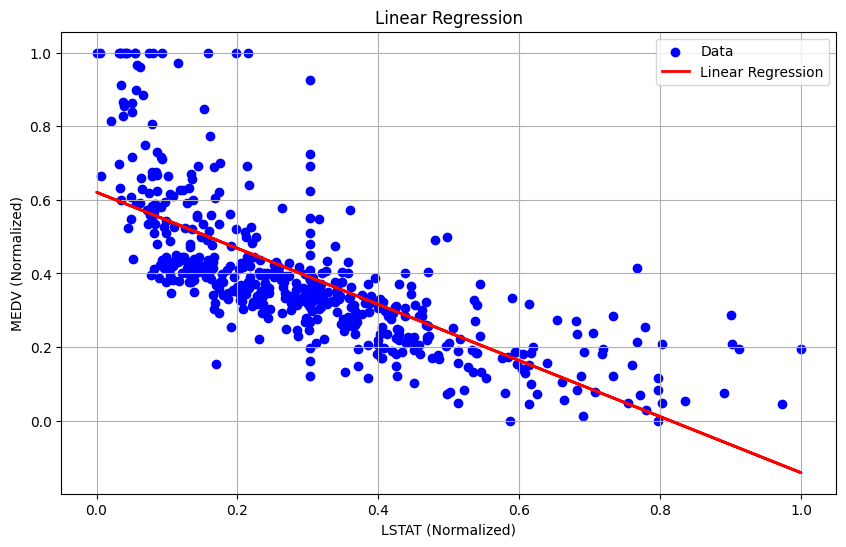

In [205]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Linear Regression')
plt.title('Linear Regression')
plt.xlabel('LSTAT (Normalized)')
plt.ylabel('MEDV (Normalized)')
plt.legend()
plt.grid(True)
plt.show()

In [210]:
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Menampilkan summary model
print("Summary Model Regresi Linear:")
print("=====================================")
print("Slope (Koefisien):", slope)
print("Intercept:", intercept)

Summary Model Regresi Linear:
Slope (Koefisien): -0.7625372227958127
Intercept: 0.6207658455708709


In [238]:
# Menambahkan fitur kuadrat
poly = PolynomialFeatures(degree=2)  # Menambahkan fitur kuadrat dengan derajat 2
X_poly = poly.fit_transform(X)

# Membangun model regresi linear
model = LinearRegression()
model.fit(X_poly, y)

# Menampilkan parameter theta
theta = model.coef_
print("Parameter theta (koefisien):", theta)

Parameter theta (koefisien): [[ 0.         -1.71799689  1.21716268]]


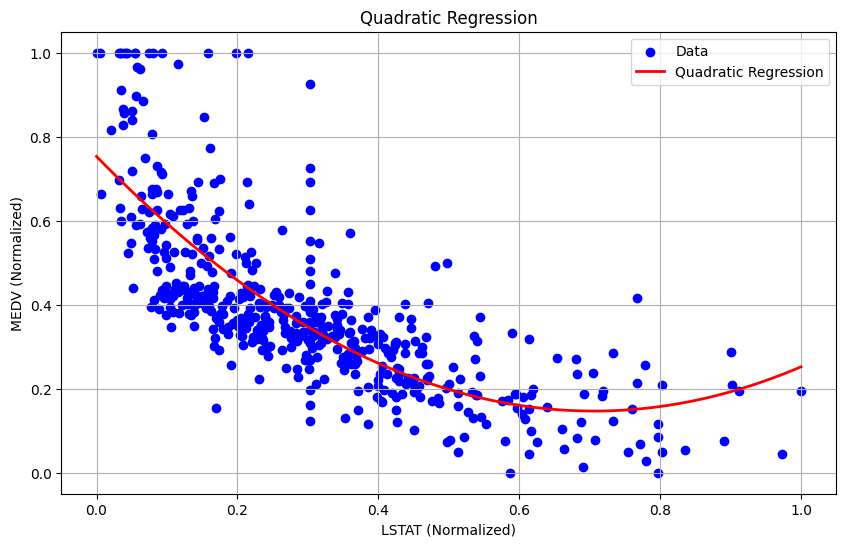

In [239]:
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Membuat plot untuk memvisualisasikan data dan garis regresi
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Quadratic Regression')
plt.title('Quadratic Regression')
plt.xlabel('LSTAT (Normalized)')
plt.ylabel('MEDV (Normalized)')
plt.legend()
plt.grid(True)
plt.show()